# Day 4 Assignment &mdash; Team 2

In [2]:
# Nothing notable about our imports
import numpy as np

from scipy.stats import norm
import scipy
import scipy.optimize as opt
from scipy import stats
from scipy.optimize import curve_fit

import astropy.constants as const
import astropy.units as u

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
%matplotlib inline

Before we begin, let's define the constants that we'll use throughout our analysis.

In [15]:
c = const.c.value # Value of c from astropy.constants
H0 = 67.4 # Planck 2018: cosmological parameters results
degRad = 57.2958 # How many degrees in a radian

Our first task is to import our data from `obj2.data`. We choose to use the function "numpy.genfromtxt" here; it's a one-line solution to file input.

In [17]:
data = np.genfromtxt("obj2.data", dtype = None)

Below, we process our data further.

To calculate redshift, we use:

$$
1+z=\gamma\left(1+\frac{v_{ \|}}{c}\right)=\sqrt{\frac{1+\frac{v_{ \|}}{c}}{1-\frac{v_{ \|}}{c}}}
$$

Solving for velocity,

$$v_{rec} = \frac{cz(z+2)}{z^{2}+2z+2}$$

In [18]:
idNum = [i[0] for i in data]
ra = [i[1] for i in data]
dec = [i[2] for i in data]
z = [i[3] for i in data]
erz = [i[4] for i in data]

dist = []
for i in z:
    vel = (c*i*(i+2.))/(i**2.+2.*i+2.)
    dist.append(vel / 67.4)

The next cell builds a scatter plot of our sources, with redshift representing color.

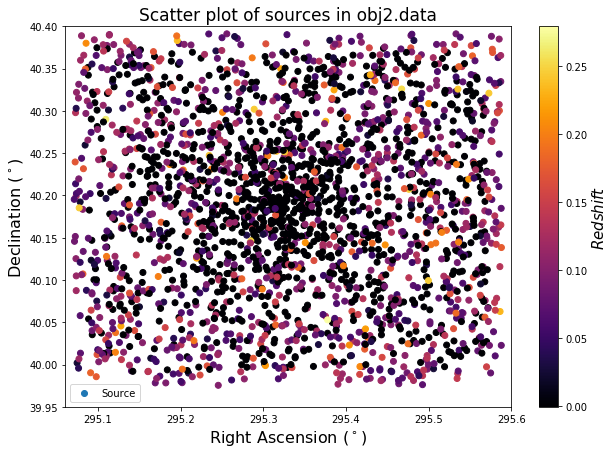

In [19]:
plt.scatter(ra, dec, c=z, cmap=cm.inferno, label='Source')
plt.title('Scatter plot of sources in obj2.data', fontsize=17)
plt.xlabel('Right Ascension $(^\circ)$', fontsize=16)
plt.ylabel('Declination $(^\circ)$', fontsize=16)
plt.ylim([39.95, 40.4])
plt.xlim([295.06 ,295.6])
plt.legend()
plt.colorbar().set_label('$Redshift$', fontsize=15)
mpl.rcParams['figure.figsize'] = 10, 7

plt.show()

Below, we display the 3D representation of the objects, with RA, DEC, and Distance (derived from Redshift) as the axes.

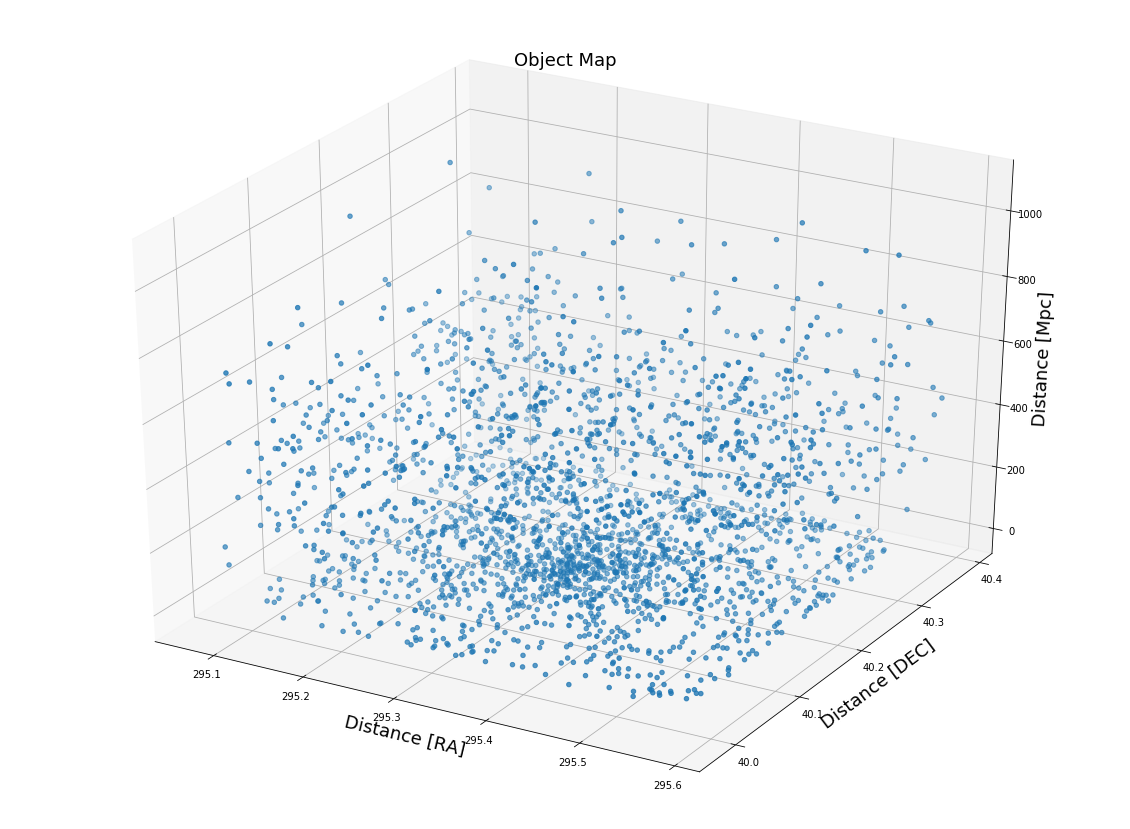

In [20]:
x = ra
y = dec

fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, dist, zdir='z', c=None, depthshade=True)
plt.title("Object Map", fontsize = 18)
ax.set_xlabel('Distance [RA]', fontsize = 18)
ax.set_ylabel('Distance [DEC]', fontsize = 18)
ax.set_zlabel('Distance [Mpc]', fontsize = 18)
plt.show()

We therefore need to systematize the plot should we wish to convert it to a proper distance-distance-distance plot. First, we need to find the origin of our data; we therefore find the mean RA and DEC below as the origin of our coordinate system by fitting Gaussians to histograms of the RA and DEC.

/home/tpena01/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/tpena01/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


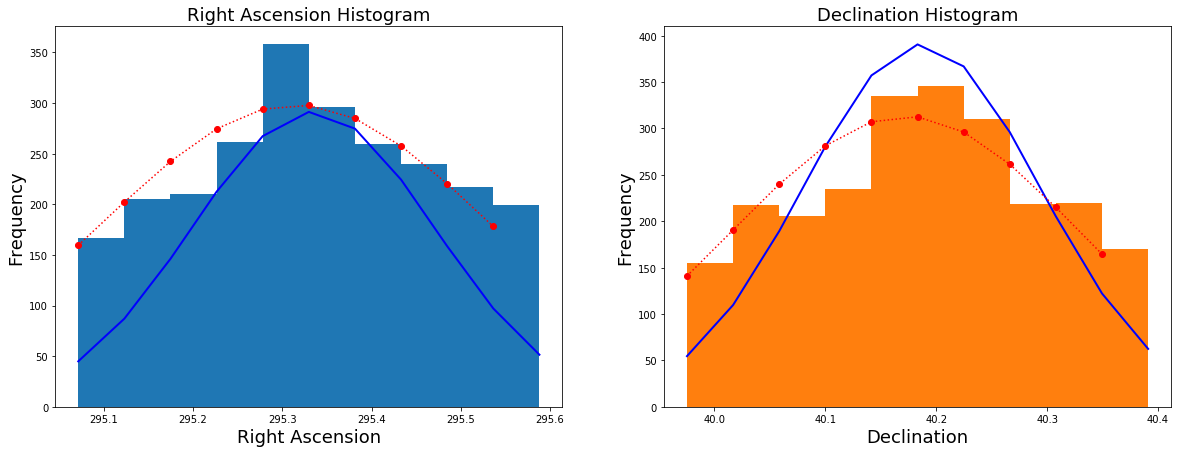

In [27]:
c = c/1000
def gaus(xx,a,x0,sigma):
    return a*np.exp(-(xx-x0)**2/(2*(sigma)**2))

muRAArr = []
muDECArr = []

plt.figure(figsize = (20,7))

plt.subplot(1,2,1)

mu, std = norm.fit(ra)
nRA, binsRA, patchesRA = plt.hist(ra)

xx = binsRA[:-1]

popt,pcov = curve_fit(gaus,xx,nRA,p0=[1,mu,std])
muRAArr.append(popt[1])

y = mlab.normpdf(binsRA, mu, std)
plt.plot(binsRA, y*popt[0]/3, color = 'blue', linewidth=2)
plt.plot(xx,gaus(xx,*popt),'ro:',label='fit')

plt.title("Right Ascension Histogram", fontsize = 18)
plt.xlabel("Right Ascension", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)

################
plt.subplot(1,2,2)
mu, std = norm.fit(dec)

mu, std = norm.fit(dec)
nDEC, binsDEC, patchesDEC = plt.hist(dec)

xx = binsDEC[:-1]

popt,pcov = curve_fit(gaus,xx,nDEC,p0=[1,mu,std])
muDECArr.append(popt[1])

y = mlab.normpdf(binsDEC, mu, std)
plt.plot(binsDEC, y*popt[0]/3, color = 'blue', linewidth=2)
plt.plot(xx,gaus(xx,*popt),'ro:',label='fit')

plt.hist(dec)
plt.title("Declination Histogram", fontsize = 18)
plt.xlabel("Declination", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)

plt.show()

Using the formula

$$
\mathbf{a}=(1+\mathbf{z})^{2} \boldsymbol{\theta} \mathbf{D}
$$

where $\theta$ is in radians and $a$ and $D$ are in Mpc, we can convert RA and DEC to distances with respect to our new coordinate system as maintained by the mean RA and DEC derived from the Gaussian-fitting in the preceding blocks.

ValueError: shape mismatch: objects cannot be broadcast to a single shape

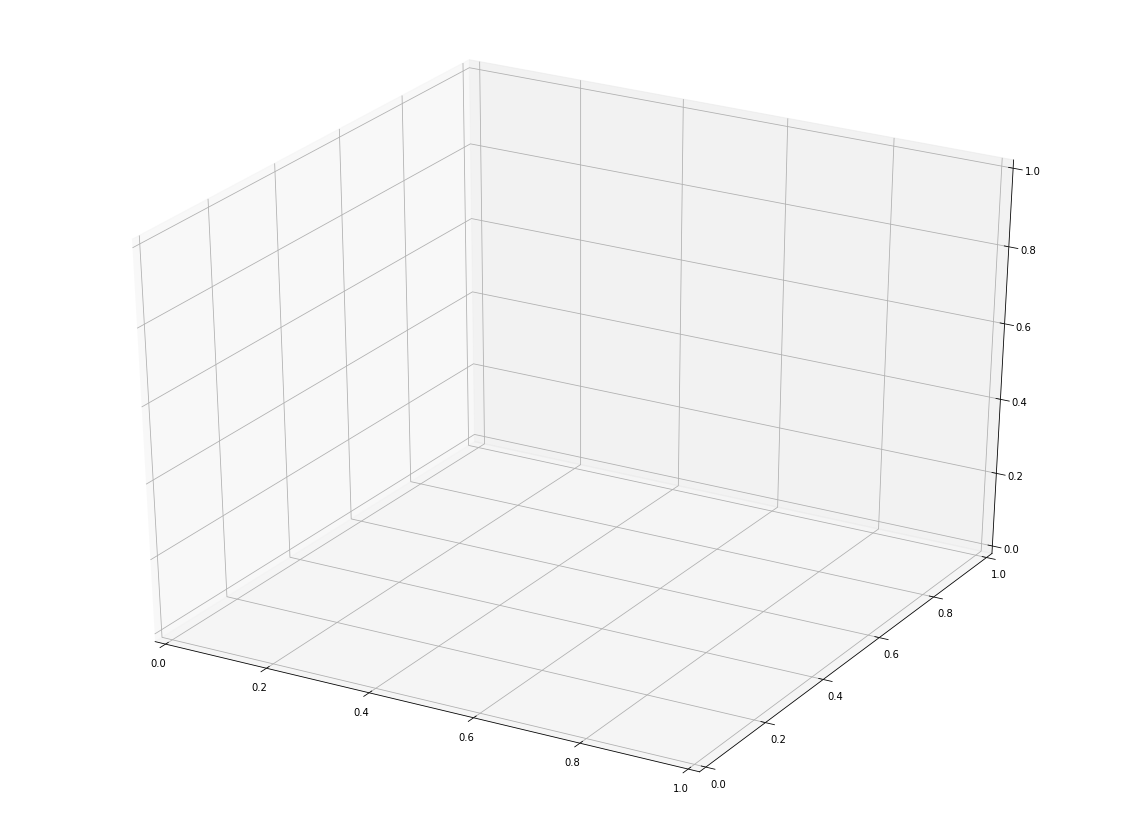

In [28]:
raCM = muRAArr[0]
decCM = muDECArr[0]

xpos = []
ypos = []

for i in range(len(ra)):
    delRA = ra[i] - raCM
    delDEC = dec[i] - decCM
    xpos.append( (1+z[i])**2. * delRA/degRad * dist[i])
    ypos.append( (1+z[i])**2. * delDEC/degRad * dist[i])
    
x = xpos
y = ypos

fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, dist, zdir='z', c=None, depthshade=True)
plt.title("Object Map", fontsize = 18)
ax.set_xlabel('Distance in Right Ascension [Mpc]', fontsize = 18)
ax.set_ylabel('Distance in Declination [Mpc]', fontsize = 18)
ax.set_zlabel('Distance in Depth [Mpc]', fontsize = 18)
plt.show()

xcm = 0.
ycm = 0.

Another way to confirm if this data sample is in fact a cluster (or supercluster) is to find the spectral index of the cumulative density plotted against scale. Should we assume the universe to be homogenous and isotropic at large scales, we would expect the number count of galaxies to increase via the relation:

$$n \propto \frac{4}{3}\pi r^{3}$$

where $n$ is the number count and $r$ is our scale. Since our calculation of X and Y distance using the mean RA and DEC as a reference is a it finnicky, we use just the redshift-derived distance dimension. We then expect that the number count should grow as 

$$n \propto r$$

or a linear curve. We should not expect a linear trend to exist at small scales as the universe is not homogenous (at around $70 \, h^{-1}$ Mpc according to Ntelis et al. (2017). At large scales, where there are not enough data points (perhaps the telescope did not observe galaxies that were too faint), we should expect a deviation from a linear trend as well.

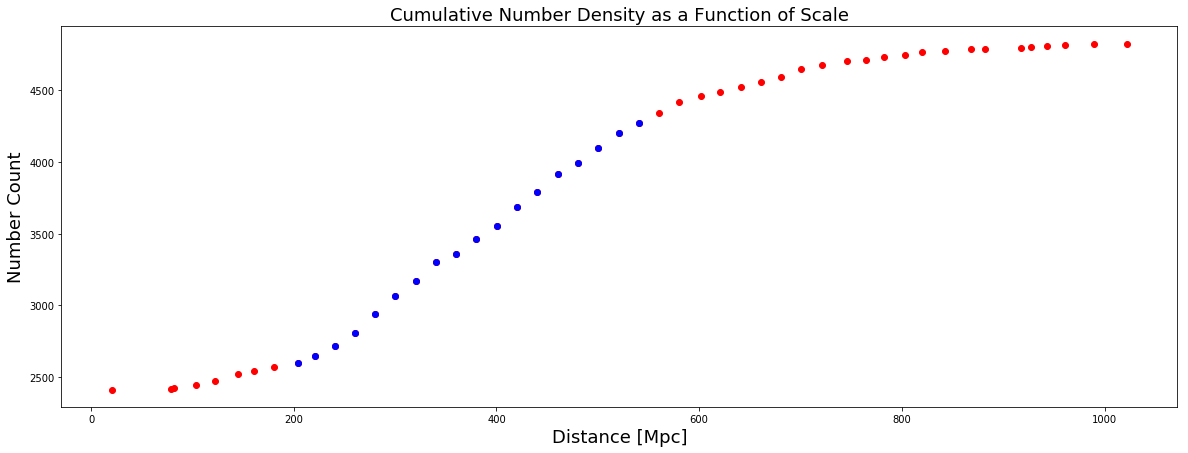

In [29]:
distSort = sorted(dist)
distStart = distSort[0]
listIndex = []
delta = 20
increment = delta

for i in range(len(distSort)):
    if distSort[i] > increment:
        listIndex.append(i)
        while distSort[i] >= increment:
            increment += delta   
            
count = []
countDist = []
for i in range(len(listIndex)-1):
    countDist.append(distSort[listIndex[i]])
    
xFit = [countDist[i] for i in range(len(countDist)) if 200.<countDist[i]<550.]
yFit = [listIndex[i] for i in range(len(countDist)) if 200.<countDist[i]<550.]

def lineFit(xFit, mFit, intFit):
    return mFit*mFit + intFit

popt,pcov = curve_fit(lineFit,yFit,xFit)


plt.figure(figsize =(20,7))
plt.title("Cumulative Number Density as a Function of Scale", fontsize = 18)
plt.xlabel("Distance [Mpc]", fontsize = 18)
plt.ylabel("Number Count", fontsize = 18)
plt.plot(countDist, listIndex[:-1], 'ro')
plt.plot(xFit, yFit, 'bo')
plt.show()

Here's a histogram of the redshifts in our sample.

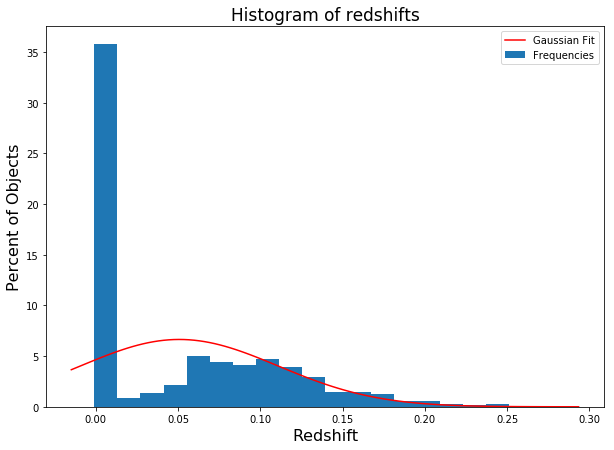

In [30]:
c = c*1000
mean, std=norm.fit(z)

plt.hist(z, bins=20, density=True,label='Frequencies')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,'r',label='Gaussian Fit')
plt.xlabel('Redshift', fontsize=16)
plt.ylabel('Percent of Objects', fontsize=16)
plt.title('Histogram of redshifts', fontsize=17)
plt.legend()
mpl.rcParams['figure.figsize'] = 10, 7
plt.show()

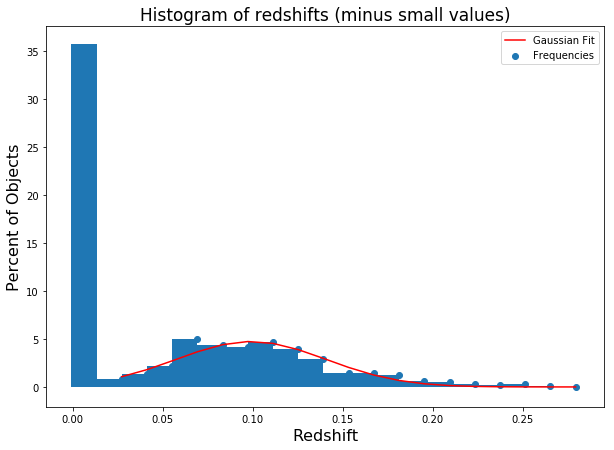

In [31]:
n,bins,patches = plt.hist(z, bins=20, density=True)
plt.scatter(bins[2:],n[1:],label='Frequencies')
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
par,cov=opt.curve_fit(gaus,bins[2:],n[1:])
a=par[0]
x0=par[1]
sigma=par[2]
x = bins[2:]
y = a*np.exp(-(x-x0)**2/(2*sigma**2))
plt.plot(x,y,'r',label='Gaussian Fit')
plt.xlabel('Redshift', fontsize=16)
plt.ylabel('Percent of Objects', fontsize=16)
plt.title('Histogram of redshifts (minus small values)', fontsize=17)
plt.legend()
plt.show()

So far, all of our analyses seem to imply that our catalog contains a galactic cluster. We can confirm this by calculating the velocity dispersion.

In [32]:
vell=[]
for i in z:
    vel = (c*i*(i+2.))/(i**2.+2.*i+2.)
    dist.append(vel / 67.4)

    vell.append(vel)
v=np.std(vell)
print (v)
print(vell)

16642.238881439884
[-5.79504422170107, 17802.812741880432, 2.5092523721948745, -26.271964150211318, 2.6981199804054516, 21482.5131451349, 37725.48394979647, 35778.017262085916, 34469.04732957084, 6.145682395109776, 2.659147309089381, 6572.741172308074, 36907.72577615641, -8.175451800425353, -78.2650387399175, -3.5975310810569745, 23320.151962813114, 4.907562368733236, 1.2501319433294635, 29313.932272796585, 8.343108010176607, 29703.94010064771, -43.62297597960839, -34.30721374386134, -9.743413212891797, 66706.98963118378, -26.023114708560126, 23085.75612074115, 28198.816043890507, 17398.09534261975, -28.33172589179305, -11.572212218185197, 1.5888958168149276, 11.14307856589608, -60.51321787320272, -0.44069523717076126, 24933.054946703276, 3.606481576622834, -9.614498294068015, 35191.88136046528, 35045.5598438052, -16.977727607285104, 46452.09382537348, 2.2184559808825, 3.8373189034018425, 18124.457056548177, 18049.47149701908, -47.88067850946632, 1.537931364735931, 31411.806908792845, 